In [1]:
import torch as t
import torchvision as tv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import torch.nn.functional as F
from datetime import datetime
from torch.autograd import Variable
from torchvision.utils import save_image
seed = 7

transform = tv.transforms.Compose([tv.transforms.ToTensor()])

train_data = tv.datasets.MNIST("data/train",train=True, download=True, transform = transform)
kwargs = {'num_workers': 1, 'pin_memory': False} # CPU
train_loader = t.utils.data.DataLoader(train_data,batch_size=32,shuffle=True,**kwargs)

In [2]:
explore_X,explore_y = [],[]
for i in range(len(train_loader)):
    
    X,y = iter(train_loader).next()    
    explore_X.append(X.numpy())
    explore_y.append(y.numpy())
    
explore_X,explore_y = np.array(explore_X).reshape([60000,1,28,28]),np.array(explore_y).reshape([1875*32])

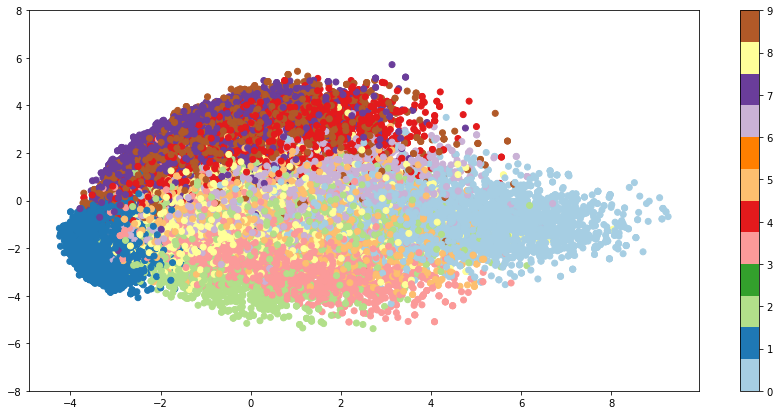

In [3]:
figure = plt.figure(figsize=(15,7))

pca = PCA(n_components=2)
proj = pca.fit_transform(explore_X.reshape(-1,784))
plt.scatter(proj[:, 0], proj[:, 1], c=explore_y, cmap="Paired")
plt.ylim([-8,8])
plt.colorbar(ticks=range(10))